#Quiz3
>sample_NoNA.csv를 읽어 들여 데이터 클랜징을 진행하세요


#풀이

##1. 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/4. 머신러닝/1. 분석 기초/2. 데이터 분석을 위한 기초 통계 수학/1. 데이터 클랜징/data/sample_NoNA.csv')
df

,class,cty,hwy
0,compact,18.0,29.0
1,compact,21.0,29.0
2,compact,NaN,31.0
3,compact,21.0,30.0
4,compact,16.0,26.0
...,...,...,...
229,midsize,19.0,28.0
230,midsize,999.0,29.0
231,midsize,16.0,26.0
232,midsize,18.0,26.0


In [ ]:
df.info()
df[10:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   219 non-null    object 
 1   cty     226 non-null    float64
 2   hwy     229 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.6+ KB


,class,cty,hwy
10,compact,19.0,27.0
11,NaN,15.0,25.0
12,compact,17.0,25.0
13,compact,17.0,25.0
14,compact,15.0,25.0
15,midsize,15.0,24.0
16,midsize,17.0,25.0
17,midsize,16.0,23.0
18,NaN,14.0,20.0
19,suv,11.0,15.0


###1.1 결측치 확인

In [ ]:
df.isnull().sum()

class    15
cty       8
hwy       5
dtype: int64

>실행 결과 class는 15, cty는 8, hwy는 5개의 결측치가 발생한 것을 알 수 있다. 여기서 class는 차종으로 패턴을 적용할 수는 없다. 이 부분은 수동으로 변경 가능한 것은 변경하고 불가능한 것들은 제거해야 한다.

##2. 차종 결측치 제거
###2.1 직접 제거

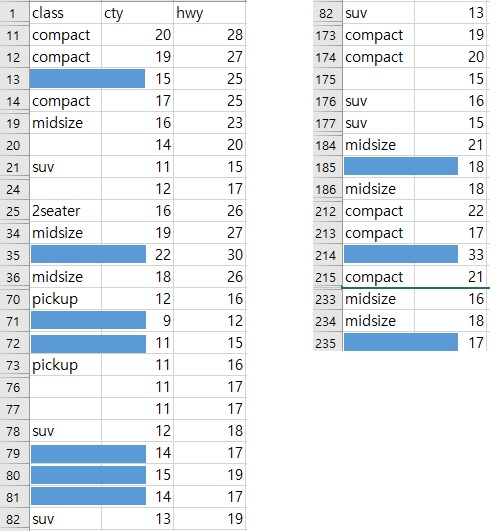

>위의 이미지에서 보듯이 파란색 부분은 앞 뒤로 같은 차종이어서 유추가 가능하다 하지만 20, 24번과 같이 서로 다른 차종 사이에 있으면 어떤것인지 유추할 수 없다. 따라서 파란색 부분은 이전 차량으로 작성하고 나머지는 비워 두자

In [ ]:
import numpy as np

df[df['class'].isnull()]

,class,cty,hwy
11,NaN,15.0,25.0
18,NaN,14.0,20.0
22,NaN,12.0,17.0
33,NaN,22.0,30.0
69,NaN,9.0,12.0
70,NaN,11.0,15.0
74,NaN,11.0,17.0
75,NaN,11.0,17.0
77,NaN,14.0,17.0
78,NaN,15.0,19.0


###2.2 변경된 파일 다시 읽어 들이기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/4. 머신러닝/1. 분석 기초/2. 데이터 분석을 위한 기초 통계 수학/1. 데이터 클랜징/data/sample_NoNA_modify.csv', engine='python', encoding='cp949')
df.isnull().sum()

class    5
cty      8
hwy      5
dtype: int64

>수정된 데이터를 다시 읽어 보면 class가 줄어든 것을 볼 수 있다. 이제 class에서 결측치로 나타나는 정보를 제거하자.

###2.3 차종 결측지 제거

In [ ]:
import numpy as np

df_classDrop = df[df['class'].notnull()]
df_classDrop.isnull().sum()

class    0
cty      8
hwy      5
dtype: int64

>notnull()함수를 이용해서 결측치 제거 후 확인한다.

##3. 이상치 처리
###3.1 이상치 확인

In [ ]:
df_classDrop.describe()

,cty,hwy
count,221.000000,224.000000
mean,29.972851,117.299107
std,114.100670,942.317620
min,-50.000000,12.000000
25%,14.000000,18.000000
50%,17.000000,25.000000
75%,19.000000,28.000000
max,999.000000,9999.000000


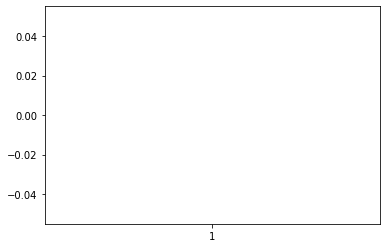

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df_classDrop['cty'])
plt.show()

>이상치 확인을 위해 boxplot을 확인해 봤지만 아무런 결과가 나오지 않는다. 이는 데이터가 숫자가 아닌 값, 즉 결측치가 포함되어 있기 때문에 문제가 발생한 것이다.

In [ ]:
df_classDrop['cty']

0       18.0
1       21.0
2        NaN
3       21.0
4       16.0
       ...  
229     19.0
230    999.0
231     16.0
232     18.0
233     17.0
Name: cty, Length: 229, dtype: float64

>위와 같이 결과를 확인해 보니 결측치(NaN)이 포함되어 있는 것을 알 수 있다. 우리는 이상치를 확인해야 함으로 결측치를 제외한 나머지 값으로 이상치를 확인해 보자

In [ ]:
data_series = df_classDrop['cty']
data_series[data_series.notnull()]

0       18.0
1       21.0
3       21.0
4       16.0
5       18.0
       ...  
229     19.0
230    999.0
231     16.0
232     18.0
233     17.0
Name: cty, Length: 221, dtype: float64

>위와 같이 결측치를 제외한 나머지 값을 얻을 수 있다.

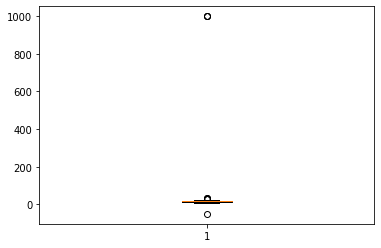

In [ ]:
plt.boxplot(data_series[data_series.notnull()])
plt.show()

>boxplot을 확인해 보면 이상치가 나타난 것을 확인할 수 있다. 그러면 이상치 값을 어떻게 처리할지 생각해 보자

In [ ]:
data_series[data_series.notnull()].describe()

count    221.000000
mean      29.972851
std      114.100670
min      -50.000000
25%       14.000000
50%       17.000000
75%       19.000000
max      999.000000
Name: cty, dtype: float64

>전체 구조를 확인해 보면 최소값과 최대값이 이상치 인것을 확인할 수 있다. 최저한계치와 최고 한계치를 구해 이 범위를 벗어난 데이터의 처리를 생각해 보자

###3.2 한계치를 이용한 이상치 확인

In [ ]:
notnullData = data_series[data_series.notnull()]
q1, q3 = np.percentile(notnullData, [25, 75])
iqr = q3-q1
lowerfence = q1-iqr*1.5
upperfence = q3+iqr*1.5

print(df_classDrop[df_classDrop['cty']<lowerfence])
print(df_classDrop[df_classDrop['cty']>upperfence])

   class   cty   hwy
63   suv -50.0  15.0
          class    cty   hwy
99   subcompact   28.0  33.0
106  subcompact  999.0  36.0
156     midsize  999.0  27.0
196     compact   28.0  37.0
212     compact   33.0  44.0
221  subcompact   35.0  44.0
222  subcompact   29.0  41.0
230     midsize  999.0  29.0


>실행 결과 결측치는 음수와 100 이상 두가지로 처리하면 된다. 이 데이터는 자동차 회사별 차종에 따른 도심 및 고속 연비를 표현한 것이다. 같은 차종이라도 회사마다 연비가 다를 것으로 판단된다. 하지만 현재 데이터에는 회사명이 별도로 존재하지 않음으로 이상치가 발생한 도심연비의 대표값을 차종과 고속연비가 같은 차량의 도심연비 중간값으로 설정할 생각이다. 중간값을 사용하는 이유는 이상치가 존재하기 때문에 평균을 구할 경우 이상치가 포함된 결과가 나올 수 있어 중간값을 지정하려 한다.

###평균 연비 구하기

In [ ]:
# lowerfence보다 작은 차는 suv	-50.0	15.0 이러한 값을 갖게 된다.
# 따라서 차종은 suv이고 고속 연비가 15인 차들의 평균 도심 연비를 구하여 값을 치환하자.
# 차종이 suv
df[df['class']=='suv']
# 고속연비가 15
df[df['hwy']==15]
# 차종은 suv이고 고속 연비가 15
df[(df['class']=='suv') & (df['hwy']==15) & (df['cty']>lowerfence)]
# 도심 연비 별도 추출
df[(df['class']=='suv') & (df['hwy']==15) & (df['cty']>lowerfence)]['cty']
# 평균 도심 연비
np.mean(df[(df['class']=='suv') & (df['hwy']==15) & (df['cty']>lowerfence)]['cty'])
# 이상치가 존재해도 이상치가 제거된 중간값이 나타남.
np.median(df[(df['class']=='suv') & (df['hwy']==15)]['cty'])

> 도심연비가 -50인 차량에 대해 차종과 고속연비(hwy)가 같은 값들을 출력해 보았다.

>numpy의 median을 이용하여 중간값을 확인해 보았더니 11이 나왔다. 이를 함수로 만들어 모든 이상치를 수정해 보자

###3.3 이상치 함수 만들기

In [ ]:
className = 'suv'
mpg='20'
df1= pd.DataFrame()
df1=df1.append({
      'class':className,
      'cty':999,
      'hwy':mpg
  }, ignore_index=True)
df1=df1.append({
      'class':className,
      'cty':999,
      'hwy':mpg
  }, ignore_index=True)
df1=df1.append({
      'class':className,
      'cty':11,
      'hwy':mpg
  }, ignore_index=True)
df1=df1.append({
      'class':className,
      'cty':-50,
      'hwy':mpg
  }, ignore_index=True)
df1

,class,cty,hwy
0,suv,999.0,20
1,suv,999.0,20
2,suv,11.0,20
3,suv,-50.0,20


In [ ]:
import numpy as np

np.median(df1['cty'])

505.0

>이상치가 여러개 존재하는 경우를 알아보자. 위와 같이 이상치가 존재한다고 가정할 때 다른 값으로 치환하기 위해 replace를 이용할 것이다. replace는 첫 번째 인자의 값을 두 번째 인자의 값으로 변환하는 기능을 한다. 위와 같은 경우 이상치는 999와-50이다 여기서 999는 중복된 데이터임으로 반복을 시킨다면 2번 동작되게 될 것이다. 이를 해결하기 위해 우선 중복 데이터를 제거해 보자

In [ ]:
#변수 지정
target = 'cty'
upper=100
lower=0
#이상치 체크
boolUpper = df1[target]>upper
boolLower = df1[target]<lower
#중복데이터 제거
df1_drop_duplicates = df1[boolUpper|boolLower].drop_duplicates(target)
print(df1_drop_duplicates)

  class    cty hwy
0   suv  999.0  20
3   suv  -50.0  20


>변수지정 부분은 추후 가변적으로 변경될 내용을 미리 작성해 둔 것이다. 함수 작성 시 활용하기 위해 변수로 만들어 두었다. 여기서는 굳이 변수 지정을 하지 않아도 상관은 없다.

>이상치 체크 부분은 발생된 이상치의 위치를 얻기 위해 진행했다.

>중복데이터 제거 부분에서는 이상치 데이터 중 중복된 데이터를 제거하기 위한 것이다.

In [ ]:
median = 11

print("1차 데이터 : ", df1_drop_duplicates[target])
print("2차 데이터 : ", df1_drop_duplicates[target][0])

for val in df1_drop_duplicates[target]:
  df1[target] = df1[target].replace(val, median)

print(df1)

1차 데이터 :  0    999.0
3    -50.0
Name: cty, dtype: float64
2차 데이터 :  999.0
  class   cty hwy
0   suv  11.0  20
1   suv  11.0  20
2   suv  11.0  20
3   suv  11.0  20


>1차 데이터에서는 target인 도심연비만 출력한 것이다.  출력 형식은 series 형식으로 나타난다. 우리가 필요한 것은 각 데이터이므로 for문을 이용하여 각 데이터를 변환 시킬 수있다.

####1차 코딩

In [ ]:
# 차종이 suv이고 고속연비가 15인 차들의 연비 대표값(중간값)
df[(df['class']=='suv') & (df['hwy']==15)]
median = np.median(df[(df['class']=='suv') & (df['hwy']==15)]['cty'])
median
# 이상치 목록

  # lowerfence, upperfence
q1, q3 = np.percentile(notnullData, [25, 75])
iqr = q3-q1
lowerfence = q1 - iqr * 4.5
upperfence = q1 + iqr * 4.5

df_drop_duplicates = df[(df['class']=='suv') & ((df['cty']<lowerfence) | (df['cty']>upperfence)) ].drop_duplicates('cty')
df_drop_duplicates
# 이상치 치환
for val in df_drop_duplicates['cty']:
  df[(df['class']=='suv') & (df['hwy']==15)] = df[(df['class']=='suv') & (df['hwy']==15)].replace(val, median)

df[(df['class']=='suv') & (df['hwy']==15)]

####2차 코딩 - 변수화

In [ ]:
# 차종이 suv이고 고속연비가 15인 차들의 연비 대표값(중간값)
# df[(df['class']=='suv') & (df['hwy']==15)]
className = 'suv'
mpg = 15

classCheck = (df['class']==className)
targetCheck = classCheck & (df['hwy']==mpg)

median = np.median(df[targetCheck]['cty'])

# 이상치 목록
gap = 4.5
  # lowerfence, upperfence
q1, q3 = np.percentile(notnullData, [25, 75])
iqr = q3-q1
lowerfence = q1 - iqr * gap
upperfence = q1 + iqr * gap

# 중복 리스트 제거
fenceCheck = (df['cty']<lowerfence) | (df['cty']>upperfence)
df_drop_duplicates = df[classCheck & fenceCheck ].drop_duplicates('cty')

# 이상치 치환
for val in df_drop_duplicates['cty']:
  df[targetCheck] = df[targetCheck].replace(val, median)

df[targetCheck]

In [ ]:
# 차종이 suv이고 고속연비가 15인 차들의 연비 대표값(중간값)
# df[(df['class']=='suv') & (df['hwy']==15)]
className = 'suv'
mpg = 15
src = 'hwy'
dest='cty'

classCheck = (df['class']==className)
targetCheck = classCheck & (df[src]==mpg)

median = np.median(df[targetCheck][dest])

# 이상치 목록
gap = 4.5
  # lowerfence, upperfence
q1, q3 = np.percentile(notnullData, [25, 75])
iqr = q3-q1
lowerfence = q1 - iqr * gap
upperfence = q1 + iqr * gap

# 중복 리스트 제거
fenceCheck = (df[dest]<lowerfence) | (df[dest]>upperfence)
df_drop_duplicates = df[classCheck & fenceCheck ].drop_duplicates(dest)

# 이상치 치환
for val in df_drop_duplicates[dest]:
  df[targetCheck] = df[targetCheck].replace(val, median)

df[targetCheck]


In [ ]:
# 차종이 suv이고 고속연비가 15인 차들의 연비 대표값(중간값)
# df[(df['class']=='suv') & (df['hwy']==15)]
# className = 'suv'
# mpg = 15
# src = 'hwy'
# dest='cty'
# gap = 4.5

def ConvertAbnormality(df, className, mpg, src, dest, gap):
  classCheck = (df['class']==className)
  targetCheck = classCheck & (df[src]==mpg)

  median = np.median(df[targetCheck][dest])

  # 이상치 목록
    # lowerfence, upperfence
  q1, q3 = np.percentile(notnullData, [25, 75])
  iqr = q3-q1
  lowerfence = q1 - iqr * gap
  upperfence = q3 + iqr * gap

  # 중복 리스트 제거
  fenceCheck = (df[dest]<lowerfence) | (df[dest]>upperfence)
  df_drop_duplicates = df[classCheck & fenceCheck ].drop_duplicates(dest)

  # 이상치 치환
  for val in df_drop_duplicates[dest]:
    df[targetCheck] = df[targetCheck].replace(val, median)

  return df

In [ ]:
df2 = ConvertAbnormality(df,'suv',15,'hwy','cty',4.5)
df2[(df2['class']=='suv') & (df2['hwy']==15)]

###3.4 이상치 제거 목록 만들기
>3.2 한계치를 이용한 이상치 만들기에서 최고 한계치를 100으로 두어야 된다고 했다. 이를 이용하여 이상치 제거 목록을 만들어 보자

In [ ]:
def getFence(gap, data):
  q1, q3 = np.percentile(data, [25, 75])
  iqr = q3-q1
  lowerfence = q1 - iqr * gap
  upperfence = q3 + iqr * gap

  return lowerfence, upperfence

lower, upper = getFence(4.5, df[df['cty'].notnull()]['cty'])
print(lower, ' : ', upper)

-8.5  :  36.5


In [ ]:
# 두 dataframe을 하나로 합치기
df_lower = df[df['cty']<lower]
df_upper = df[df['cty']>upper]
df_drop_list = pd.concat([df_lower, df_upper])
df_drop_list

,class,cty,hwy
62,suv,-50.0,15.0
105,subcompact,999.0,36.0
155,midsize,999.0,27.0
228,midsize,999.0,29.0


In [ ]:
# 중복값 제거
df_drop_list = df_drop_list.drop_duplicates(['class', 'cty', 'hwy'])

,class,cty,hwy
62,suv,-50.0,15.0
105,subcompact,999.0,36.0
155,midsize,999.0,27.0


>위에서 만든 목록을 바탕으로 모든 이상치를 치환해 보자 

In [ ]:
for idx, row in df_drop_list.iterrows():
  # print(idx, ' : ', row)
  # print(row['class'], ' : ', row['cty'], ' : ', row['hwy'])
  # df = ConvertAbnormality(df, className, mpg, src, dest, gap)
  df = ConvertAbnormality(df, row['class'], row['hwy'], 'hwy', 'cty', 4.5)
  print(df[(df['class']==row['class']) & (df['hwy']==row['hwy'])])

  # 25, 999
  # 25, -50
  # 데이터가 두 개인 경우 중간값은 평균으로 만들어짐으로
  # 최소값이 lowerfence보다 크다면 최소값을 
  # 최대값이 upperfence보다 작다면 최대값을 대표값으로 선정

>실행결과 다음과 같은 문제가 발생했다.
*        class    cty   hwy
*105  subcompact   25.0  36.0
*106  subcompact  512.0  36.0

>데이트가 2개만 존재하여 (25 + 999)/2로 도심연비가 나오게 되었다. 이를 해결하기 위해 데이터가 2개 이하이면 최소값을 중간값으로 처리하도록 함수를 변경해 적용하자.

###3.5 버그 수정

In [ ]:
def getMedian(df_sample, target, lower, upper):
  # print(df_sample[target])
  # print(df_sample[target].describe())
  # print(df_sample[target].describe()['count'])
  cnt = df_sample[target].describe()['count']

  if cnt<=2:
    # 최소값이 lowerfence보다 크다면 최소값을 
    min = df_sample[target].describe()['min']
    if min > lower:
      # print(min)
      return min
    # 최대값이 upperfence보다 작다면 최대값을 대표값으로 선정
    max = df_sample[target].describe()['max']
    if max < upper:
      # print(max)
      return max
  else:
    # print(df_sample[target].describe()['50%'])
    return df_sample[target].describe()['50%']

# getMedian(df, 'cty')
# df_sample = df[(df['class']=='subcompact') & (df['hwy']==36)]
# df_sample = df[(df['class']=='suv') & (df['hwy']==15)]

lower, upper = getFence(4.5, df[df['cty'].notnull()]['cty'])
df_sample = df[(df['class']=='subcompact') & (df['hwy']==36)]
getMedian(df_sample, 'cty', lower, upper)

In [ ]:
def ConvertAbnormality(df, className, mpg, src, dest, gap):
  classCheck = (df['class']==className)
  targetCheck = classCheck & (df[src]==mpg)

  # median = np.median(df[targetCheck][dest])

  # 이상치 목록
    # lowerfence, upperfence
  q1, q3 = np.percentile(notnullData, [25, 75])
  iqr = q3-q1
  lowerfence = q1 - iqr * gap
  upperfence = q1 + iqr * gap
  # print(df[targetCheck][dest])
  median = getMedian(df[targetCheck], dest, lowerfence, upperfence)
  # print(median)
  # 중복 리스트 제거
  fenceCheck = (df[dest]<lowerfence) | (df[dest]>upperfence)
  df_drop_duplicates = df[classCheck & fenceCheck ].drop_duplicates(dest)

  # 이상치 치환
  for val in df_drop_duplicates[dest]:
    df[targetCheck] = df[targetCheck].replace(val, median)

  return df

In [ ]:
for idx, row in df_drop_list.iterrows():
  df = ConvertAbnormality(df, row['class'], row['hwy'], 'hwy', 'cty', 4.5)
  print(df[(df['class']==row['class']) & (df['hwy']==row['hwy'])])

          class   cty   hwy
104  subcompact  25.0  36.0
105  subcompact  25.0  36.0


###3.6 고속연비 확인

In [ ]:
#  이상치 확인 - describe
df.describe()

In [ ]:
# 2. 이상치 시각화 - boxplot
# df[df['hwy'].notnull()]['hwy']
plt.boxplot(df[df['hwy'].notnull()]['hwy'])

In [ ]:
# IRQ
notnullData = df[df['hwy'].notnull()]
notnullData

In [ ]:
lower, upper = getFence(3, notnullData['hwy'])
print(lower, upper)


In [ ]:
df_lower = df[df['hwy']<lower]
df_upper = df[df['hwy']>upper]
df_drop_list = pd.concat([df_lower, df_upper])
df_drop_list

In [ ]:
# 제거 또는 치환 - replace
for idx, row in df_drop_list.iterrows():
  # ConvertAbnormality(df, row['class'], row['cty'], 'cty', 'hwy', 3)
  df = ConvertAbnormality(df, row['class'], row['cty'], 'cty', 'hwy', 3, notnullData['hwy'])
  print(df[(df['class']==row['class']) & (df['cty']==row['cty'])])

>위 처럼 고속연비의 이상치를 치환할 수 있다.

##4. 결측치

###4.1 결측치 확인

In [ ]:
df.isnull().sum()

In [ ]:
df[df['cty'].isnull()]

In [ ]:
# df['class']=='compact'
# df[df['class']=='compact']
# df['hwy']==31
# df[df['hwy']==31]
# (df['class']=='compact') & (df['hwy']==31)
classCompact = df['class']=='compact'
hwy31 = df['hwy']==31
classCompact & hwy31

df[classCompact & hwy31]

In [ ]:
# df[classCompact & hwy31].mean()
# df[classCompact & hwy31].mean()['cty']
df[classCompact & hwy31]['cty'].mean()

21.5

###4.2 결측치 치환 함수

In [ ]:
df_sample = df

In [ ]:
# 결측치 발생 데이터 추출
classCompact = df_sample['class']=='compact'
hwy31 = df_sample['hwy']==31
classCompact & hwy31

df_sample_Nan = df_sample[classCompact & hwy31]

# 대표값인 평균값 구하기
mean = df_sample_Nan['cty'].mean()
mean

# 치환
df_sample[classCompact & hwy31] = df_sample[classCompact & hwy31].replace({'cty':np.nan}, {'cty':mean})
df_sample[classCompact & hwy31]
df_sample

In [ ]:
className = 'compact'
mpg = 31
src = 'hwy'
dst = 'cty'

# 결측치 발생 데이터 추출
classCompact = df_sample['class']==className
hwy31 = df_sample[src]==mpg

df_sample_Nan = df_sample[classCompact & hwy31]

# 대표값인 평균값 구하기
mean = df_sample_Nan[dst].mean()

# 치환
df_sample[classCompact & hwy31] = df_sample[classCompact & hwy31].replace({dst:np.nan}, {dst:mean})
df_sample[classCompact & hwy31]

In [ ]:
def ReplaceNaN(df_sample, className, mpg, src, dst):
  # 결측치 발생 데이터 추출
  classCompact = df_sample['class']==className
  hwy31 = df_sample[src]==mpg

  df_sample_Nan = df_sample[classCompact & hwy31]

  # 대표값인 평균값 구하기
  mean = df_sample_Nan[dst].mean()

  # 치환
  df_sample[classCompact & hwy31] = df_sample[classCompact & hwy31].replace({dst:np.nan}, {dst:mean})

  return df_sample

df2 = ReplaceNaN(df_sample, 'compact', 31, 'hwy','cty')
df2

>위와 같이 간단하게 결측치 변경 함수를 만들었다.

###4.3 결측치 목록 함수

In [ ]:
df_NaN = df[df['cty'].isnull()]
# class, hwy만 가지고 있는 dataframe을 만드시오
df_NaN1 = df_NaN[ ['class', 'hwy'] ]

df_class = df_NaN['class']
df_class

df_hwy = df_NaN['hwy']
df_hwy

# df_NaN = pd.concat([df_class, df_hwy])
# df_NaN

df_NaN_class_hwy=pd.DataFrame()
df_NaN_class_hwy['class'] = df_class

df_NaN_class_hwy['hwy'] = df_hwy
df_NaN_class_hwy

# 중복 데이터 처리
df_NaN_list = df_NaN_class_hwy.drop_duplicates(['class', 'hwy'])
df_NaN_list

In [ ]:
def getNaNList(df, src, dst):
  # df_NaN = df[df[src].isnull()]
  # df_NaN1 = df_NaN[ ['class', dst] ].drop_duplicates(['class', dst])
  # print(df_NaN1)
  df_NaN = df[df[src].isnull()]
  return df_NaN[ ['class', dst] ].drop_duplicates(['class', dst])

df_NaN_list = getNaNList(df, 'cty', 'hwy')
df_NaN_list

,class,hwy
20,suv,20.0
57,suv,17.0
92,subcompact,24.0
99,subcompact,32.0
190,compact,27.0
197,suv,18.0


>위처럼 도심연비가 결측치인 값들만 추려 놓을 수 있다.

In [ ]:
for idx, row in df_NaN_list.iterrows():
  # print(row['class'], ' : ', row['hwy'])
  print(row.values[0], ' : ', row.values[1])

>이렇게 추려진 값을 하나씩 출력하는 코드이다. 위의 세 코드를 이용하여 결측치를 해결할 수 있다.

###4.4 모든 결측치 치환

In [ ]:
# df.isnull().sum()
df_sample = df

In [ ]:
# 도심연비가 결측치인 데이터 치환
# 결측치 목록 읽기
df_NaN_list = getNaNList(df, 'cty', 'hwy')

# 결측치 치환
for idx, row in df_NaN_list.iterrows():
  df_sample = ReplaceNaN(df_sample, row['class'], row['hwy'], 'hwy','cty')

df_sample.isnull().sum()

In [ ]:
# 고속연비가 결측치인 데이터 치환
# 결측치 목록 읽기
df_NaN_list = getNaNList(df, 'hwy', 'cty')

# 결측치 치환
for idx, row in df_NaN_list.iterrows():
  df_sample = ReplaceNaN(df_sample, row['class'], row['cty'],'cty', 'hwy')

df_sample.isnull().sum()

하나의 결측치가 발생하여 다음과 같이 데이터를 출력해 보았다.

In [ ]:
df_sample[df_sample['hwy'].isnull()]
# df_sample[df_sample['hwy'].isna()]

In [ ]:
classCompact = df_sample['class']=='pickup'
hwy31 = df_sample['cty']==17
classCompact & hwy31

df_sample[classCompact & hwy31]

###4.5 버그 제거

In [ ]:
df_test = df_sample[classCompact & hwy31]
df_test.index[0]

200

In [ ]:
# df_sample.drop(index=df_test.index[0]).isnull().sum()
df_sample.isnull().sum()

class    0
cty      0
hwy      1
dtype: int64

In [ ]:
def ReplaceNaN(df_sample, className, mpg, src, dst):
  # 결측치 발생 데이터 추출
  classCompact = df_sample['class']==className
  hwy31 = df_sample[src]==mpg

  df_sample_Nan = df_sample[classCompact & hwy31]

  # 대표값인 평균값 구하기
  # if np.isnan()
  mean = df_sample_Nan[dst].mean()

  print(mean)

  if np.isnan(mean):
    df_sample = df_sample.drop(index=df_sample_Nan.index[0])
  else:
  # 치환
    df_sample[classCompact & hwy31] = df_sample[classCompact & hwy31].replace({dst:np.nan}, {dst:mean})

  return df_sample

df2 = ReplaceNaN(df_sample, 'pickup', 17,'cty', 'hwy')
df2.isnull().sum()

nan


class    0
cty      0
hwy      0
dtype: int64

>결과를 실행해 보니 참조할 데이터가 존재하지 않았다. 이런 경우 데이터를 삭제하도록 함수를 변경했다.

In [ ]:
# 고속연비가 결측치인 데이터 치환
# 결측치 목록 읽기
df_NaN_list = getNaNList(df, 'hwy', 'cty')

# 결측치 치환
for idx, row in df_NaN_list.iterrows():
  df_sample = ReplaceNaN(df_sample, row['class'], row['cty'],'cty', 'hwy')

df_sample.isnull().sum()

>다시 실행해 보면 정상적으로 동작되는 것을 볼 수 있다.